# Data organization and cleaning

In [8]:
import pandas as pd
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
import statistics

In [11]:
df = pd.read_csv('Most-Recent-Field-Data-Elements.csv').dropna()
df = df[~df.COUNT.str.contains("PrivacySuppressed")]
df = df[~df.DEBTMEDIAN.str.contains("PrivacySuppressed")]
df = df[~df.DEBTPAYMENT10YR.str.contains("PrivacySuppressed")]
df = df[~df.TITLEIVCOUNT.str.contains("PrivacySuppressed")]
df = df[~df.EARNINGSCOUNT.str.contains("PrivacySuppressed")]
df = df[~df.MD_EARN_WNE.str.contains("PrivacySuppressed")]
df.tail()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
210537,489788.0,4586,Purdue University Global-Milwaukee,"Private, for-profit",0,5203,Accounting and Related Services.,3,Bachelors Degree,446,38197,396,38580,379,357,39700,0.0,2.0
210538,489788.0,4586,Purdue University Global-Milwaukee,"Private, for-profit",0,5203,Accounting and Related Services.,5,Master's Degree,323,47084,549,45079,339,319,48100,0.0,0.0
210541,489788.0,4586,Purdue University Global-Milwaukee,"Private, for-profit",0,5208,Finance and Financial Management Services.,5,Master's Degree,68,50276,586,49237,81,77,51100,0.0,0.0
210543,489812.0,36783,Pima Medical Institute-Dillon,"Private, for-profit",0,5108,Allied Health and Medical Assisting Services.,1,Undergraduate Certificate or Diploma,140,9500,99,8322,115,103,24100,11.0,19.0
210596,490009.0,7297,Spartan College of Aeronautics and Technology,"Private, for-profit",0,4706,Vehicle Maintenance and Repair Technologies.,2,Associate's Degree,221,20642,214,19596,322,312,41100,35.0,28.0


In [61]:
df.dropna().describe(include='all')

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
count,35550.000000,35550.000000,35550,35550,35550.000000,35550.000000,35550,35550.000000,35550,35550,35550,35550,35550,35550,35550,35550,35550.000000,35550.000000
unique,NaN,NaN,4598,3,NaN,NaN,317,NaN,7,888,13129,1530,19419,798,752,1203,NaN,NaN
top,NaN,NaN,Ohio State University-Main Campus,Public,NaN,NaN,"Business Administration, Management and Operat...",NaN,Bachelors Degree,32,27000,280,32842,25,22,31800,NaN,NaN
freq,NaN,NaN,111,18797,NaN,NaN,2311,NaN,19055,484,1942,2073,37,711,813,170,NaN,NaN
mean,229641.008748,7401.040141,NaN,NaN,0.818678,3628.809086,NaN,3.083854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.826610,87.690183
std,111485.669416,9515.171525,NaN,NaN,0.385290,1702.749958,NaN,1.318406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.498763,174.939054
min,100654.000000,1002.000000,NaN,NaN,0.000000,100.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,156107.000000,2150.000000,NaN,NaN,1.000000,1506.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,26.000000
50%,197133.000000,3302.000000,NaN,NaN,1.000000,4407.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,48.000000
75%,233949.000000,7780.000000,NaN,NaN,1.000000,5135.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,95.000000


# Analysis based on mean debt

### Top

In [239]:
df_n = df[['INSTNM','DEBTMEAN', 'CONTROL', 'COUNT']].sort_values(by=['COUNT'], ascending=False).head(10)
# df_n[df_n['CONTROL'] == 'Public']
df_n

,INSTNM,DEBTMEAN,CONTROL,COUNT
163901,Sam Houston State University,21108,Public,998
24528,Walden University,24432,"Private, for-profit",995
97721,University of Nebraska-Lincoln,20570,Public,99
68656,Anne Arundel Community College,17554,Public,99
117494,Utica College,33103,"Private, nonprofit",99
67533,Maine College of Health Professions,17912,"Private, nonprofit",99
68068,University of Maine,23224,Public,99
68143,University of New England,24311,"Private, nonprofit",99
204670,Dorsey Business Schools-Saginaw,8699,"Private, for-profit",99
25740,The Art Institute of Colorado,36026,"Private, for-profit",99


In [240]:
# df_n[df_n['CONTROL'] == 'Private, nonprofit']

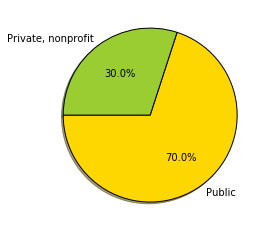

In [238]:
slices = [7,3]
labels = ['Public', 'Private, nonprofit']
cols = ['gold', 'yellowgreen', 'lightcoral', 'blue']

plt.pie(slices, labels=labels,
        wedgeprops={"edgecolor": "black"}, 
        colors=cols, 
        shadow=True,
        startangle=180,
        autopct="%1.1f%%"
       )
plt.show()

### Bottom

In [219]:
df_ne = df[['INSTNM','DEBTMEAN', 'CONTROL']].sort_values(by=['DEBTMEAN'], ascending=False).tail(10)
df_ne

,INSTNM,DEBTMEAN,CONTROL
131901,Ohio Valley College of Technology,10011,"Private, for-profit"
190229,Suffolk County Community College,10009,Public
208172,Ridley-Lowell Business & Technical Institute,10006,"Private, for-profit"
204726,Ridley-Lowell Business & Technical Institute-D...,10006,"Private, for-profit"
29254,Ridley-Lowell Business & Technical Institute-N...,10006,"Private, for-profit"
197259,Ridley-Lowell Business & Technical Institute-P...,10006,"Private, for-profit"
174572,Virginia Commonwealth University,100058,Public
92354,State Technical College of Missouri,10005,Public
155016,Chattanooga State Community College,10003,Public
26280,Community College of Denver,10003,Public


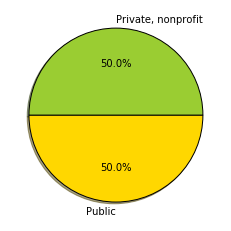

In [220]:
slices = [5,5]
labels = ['Public', 'Private, nonprofit']
cols = ['gold', 'yellowgreen', 'lightcoral', 'blue']

plt.pie(slices, labels=labels,
        wedgeprops={"edgecolor": "black"}, 
        colors=cols, 
        shadow=True,
        startangle=180,
        autopct="%1.1f%%"
       )
plt.show()

## Analysis based on median earnings for graduates

#### Top

In [200]:
df_new = df[['INSTNM','MD_EARN_WNE', 'CREDLEV']].sort_values(by=['MD_EARN_WNE'], ascending=False).head(50)
df_new

,INSTNM,MD_EARN_WNE,CREDLEV
154532,University of South Dakota,99900,5
63724,University of Louisville,99800,7
181266,Marquette University,99800,5
131077,Ohio Dominican University,99700,5
12298,University of California-San Diego,99700,5
119353,Duke University,99600,3
43509,Idaho State University,99600,5
193747,Capella University,99500,6
84025,Wayne State University,99500,5
139869,DeSales University,99400,5


#### Bottom

In [201]:
df_new = df[['INSTNM','MD_EARN_WNE', 'CREDLEV']].sort_values(by=['MD_EARN_WNE'], ascending=False).tail()
df_new

,INSTNM,MD_EARN_WNE,CREDLEV
154829,Bethel University,100100,5
155865,South College,100100,5
133190,University of Toledo,100000,5
185477,Inter American University of Puerto Rico-San G...,10000,3
186122,University of Puerto Rico-Arecibo,10000,3


In [129]:
type_counter = Counter()

## Most undertaken degrees table & Graph

In [130]:
x = [i for i in df['CREDDESC']]
type_counter.update(x)
type_ = []
no_of_degrees = []
for t in type_counter:
    type_.append(t)
    no_of_degrees.append(type_counter[t])
print("Mean" , statistics.mean(no_of_degrees))
df_ = pd.DataFrame({"Total number of undertaking":no_of_degrees}, [type_])
df_

Mean 5078.571428571428


,Total number of undertaking
Bachelors Degree,19055
Master's Degree,6208
Graduate/Professional Certificate,204
First Professional Degree,517
Doctoral Degree,270
Associate's Degree,5259
Undergraduate Certificate or Diploma,4037


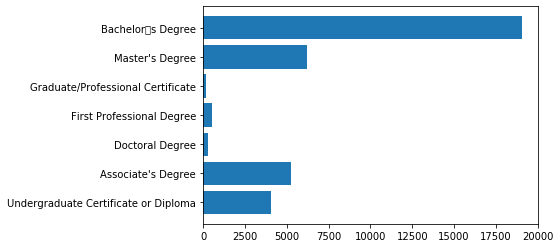

In [131]:
plt.barh(type_[::-1], no_of_degrees[::-1])
plt.show()

In [132]:
df.describe()

,UNITID,OPEID6,MAIN,CIPCODE,CREDLEV,IPEDSCOUNT1,IPEDSCOUNT2
count,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000
mean,229641.008748,7401.040141,0.818678,3628.809086,3.083854,87.826610,87.690183
std,111485.669416,9515.171525,0.385290,1702.749958,1.318406,170.498763,174.939054
min,100654.000000,1002.000000,0.000000,100.000000,1.000000,0.000000,0.000000
25%,156107.000000,2150.000000,1.000000,1506.000000,2.000000,27.000000,26.000000
50%,197133.000000,3302.000000,1.000000,4407.000000,3.000000,49.000000,48.000000
75%,233949.000000,7780.000000,1.000000,5135.000000,3.000000,95.000000,95.000000
max,490009.000000,42544.000000,1.000000,5401.000000,8.000000,8911.000000,8089.000000


In [133]:
df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
15,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelors Degree,25,36250,376,37194,33,33,54300,17.0,16.0
24,100654.0,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelors Degree,46,31505,327,33085,32,31,25400,24.0,33.0
27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelors Degree,22,34809,361,36482,33,31,54500,19.0,11.0
37,100654.0,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelors Degree,39,29956,311,30970,30,30,24000,28.0,28.0
38,100654.0,1002,Alabama A & M University,Public,1,2601,"Biology, General.",3,Bachelors Degree,59,34000,353,32783,31,30,23800,30.0,43.0


## Comparison between top and bottom ranked universities

In [169]:
alabama = np.array(df[df['INSTNM'] != 'Alabama A & M University']['DEBTMEAN'].head()).tolist()
spartan = np.array(df[df['INSTNM'] == 'Spartan College of Aeronautics and Technology']['DEBTMEAN'].head()).tolist()
DEBTMEAN =  df['INSTNM']
dist = [1,2,3,4,5]
alabama

['21667', '25889', '25440', '56814', '28717']

### Analysis by debt mean

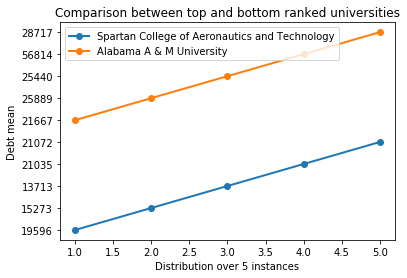

In [186]:
plt.plot(dist, spartan, label="Spartan College of Aeronautics and Technology", linewidth=2, marker="o") 
plt.plot(dist, alabama, label="Alabama A & M University", linewidth=2, marker="o")
plt.xlabel('Distribution over 5 instances')
plt.ylabel('Debt mean')
plt.title('Comparison between top and bottom ranked universities')
plt.legend() 

# Analysis for merged scorecard data

In [45]:
df1 = pd.read_csv('MERGED2018_19_PP.csv')

In [59]:
df1[['INSTNM','ADM_RATE', 'STABBR']].dropna().describe(include='all')

,INSTNM,ADM_RATE,STABBR
count,2006,2006.000000,2006
unique,1991,NaN,55
top,Union College,NaN,NY
freq,3,NaN,204
mean,NaN,0.678958,NaN
std,NaN,0.217596,NaN
min,NaN,0.000000,NaN
25%,NaN,0.552575,NaN
50%,NaN,0.702700,NaN
75%,NaN,0.844125,NaN


In [4]:
df1 = pd.read_csv('MERGED2018_19_PP.csv')
df1

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,https://galileo.aamu.edu/NetPriceCalculator/np...,...,0.2216,0.0222,0.4523,0.2062,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.1237,0.0969,0.2377,0.4179,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.4419,0.0299,0.2239,0.4627,0.2836,1.0000,1.0000,440.0,527.0,5.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.1449,0.0292,0.3841,0.3371,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.2005,0.0485,0.4757,0.2136,0.2621,0.7792,0.7539,4732.0,642.0,951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,www.gmc.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,www.gmc.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,Health Career Institute- Lauderdale Lakes,Lauderdale Lakes,FL,333137268,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Illinois universtities analyzed according to admission rate

### Top

In [231]:
df1_data = df1[['INSTNM','ADM_RATE', 'STABBR']].dropna()
df1_ = df1_data[df1_data['STABBR'] == 'IL'].sort_values(by=['ADM_RATE'], ascending=False).head(10)
df1_

,INSTNM,ADM_RATE,STABBR
1020,Telshe Yeshiva-Chicago,1.0000,IL
916,Graham Hospital School of Nursing,1.0000,IL
971,Moody Bible Institute,0.9507,IL
5798,DeVry University-Illinois,0.9450,IL
1027,VanderCook College of Music,0.9310,IL
921,Hebrew Theological College,0.9286,IL
990,Principia College,0.9195,IL
933,Illinois State University,0.8918,IL
1019,Taylor Business Institute,0.8767,IL
1018,Southern Illinois University-Edwardsville,0.8744,IL


### Bottom

In [233]:
df2_ = df1_data[df1_data['STABBR'] == 'IL'].sort_values(by=['ADM_RATE'], ascending=False).tail(10)
df2_

,INSTNM,ADM_RATE,STABBR
998,Rockford University,0.4903,IL
917,Greenville University,0.4839,IL
1003,University of St Francis,0.4678,IL
980,North Park University,0.4658,IL
967,Methodist College,0.3919,IL
915,Governors State University,0.3835,IL
888,Chicago State University,0.3276,IL
983,Northwestern University,0.0847,IL
890,University of Chicago,0.0726,IL
1015,Saint Anthony College of Nursing,0.0000,IL


# Linear regression

In [62]:
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
import os
import seaborn as sns
%matplotlib inline

## Merge the tables to get aggregated variables for analysis


In [56]:
# jumia_products.merge(kilimall_products, on="Name", how="inner")
df = pd.read_csv('Most-Recent-Field-Data-Elements.csv').dropna()
df = df[~df.COUNT.str.contains("PrivacySuppressed")]
df = df[~df.DEBTMEDIAN.str.contains("PrivacySuppressed")]
df = df[~df.DEBTPAYMENT10YR.str.contains("PrivacySuppressed")]
df = df[~df.TITLEIVCOUNT.str.contains("PrivacySuppressed")]
df = df[~df.EARNINGSCOUNT.str.contains("PrivacySuppressed")]
df = df[~df.MD_EARN_WNE.str.contains("PrivacySuppressed")]

dfa = pd.read_csv('MERGED2018_19_PP.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [195]:
d_merge = df.merge(dfa, on="INSTNM", how="inner")
d_merge = d_merge[['INSTNM', 'STABBR', 'COUNT','CREDLEV', 'DEBTMEDIAN', 'DEBTPAYMENT10YR', 'EARNINGSCOUNT', 'MD_EARN_WNE', 'ADM_RATE']]
d_merge.head()

,INSTNM,STABBR,COUNT,CREDLEV,DEBTMEDIAN,DEBTPAYMENT10YR,EARNINGSCOUNT,MD_EARN_WNE,ADM_RATE
0,Alabama A & M University,AL,25,3,36250,376,33,54300,0.8986
1,Alabama A & M University,AL,46,3,31505,327,31,25400,0.8986
2,Alabama A & M University,AL,22,3,34809,361,31,54500,0.8986
3,Alabama A & M University,AL,39,3,29956,311,30,24000,0.8986
4,Alabama A & M University,AL,59,3,34000,353,30,23800,0.8986


## Data cleaning removing outliers

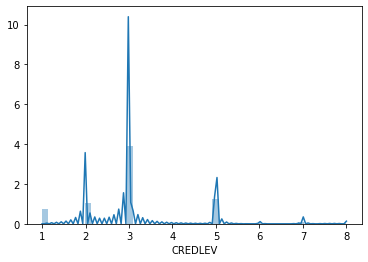

In [74]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(d_merge['CREDLEV']);

In [75]:
# Let's declare a variable that will be equal to the 99th percentile of the 'CREDLEV' variable
q = d_merge['CREDLEV'].quantile(0.99)
# Then we can create a new df, with the condition that all CREDLEV must be below the 99 percentile of 'CREDLEV'
data_1 = d_merge[d_merge['CREDLEV']<q]
# In this way we have essentially removed the top 1% of the data about 'CREDLEV'
data_1.describe(include='all')### Dealing with outliers

,INSTNM,STABBR,COUNT,CREDLEV,DEBTMEDIAN,DEBTPAYMENT10YR,EARNINGSCOUNT,MD_EARN_WNE,ADM_RATE
count,33491,33491,33491,33491.000000,33491,33491,33491,33491,22924.000000
unique,4171,54,863,NaN,12373,1182,725,1134,NaN
top,Columbia College,CA,32,NaN,27000,280,22,31800,NaN
freq,140,2545,473,NaN,1966,2099,811,157,NaN
mean,NaN,NaN,NaN,3.017497,NaN,NaN,NaN,NaN,0.671196
std,NaN,NaN,NaN,1.165080,NaN,NaN,NaN,NaN,0.206113
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,0.559900
50%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.709200
75%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.822000


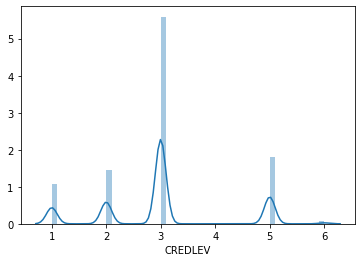

In [76]:
sns.distplot(data_1['CREDLEV']);

## Preliminary distribution plots

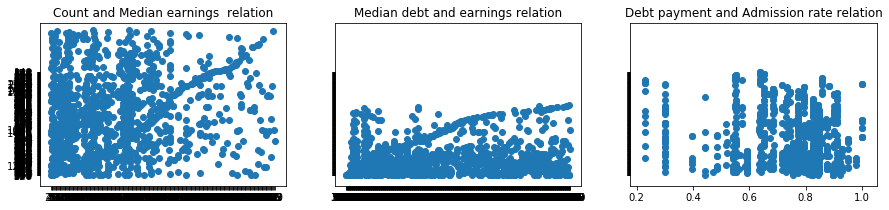

In [254]:
processed_df = data_1.head(1500).dropna()
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(processed_df['COUNT'],processed_df['MD_EARN_WNE'])
ax1.set_title('Count and Median earnings  relation')
ax2.scatter(processed_df['DEBTMEDIAN'],processed_df['EARNINGSCOUNT'])
ax2.set_title('Median debt and earnings relation')
ax3.scatter(processed_df['ADM_RATE'],processed_df['DEBTPAYMENT10YR'])
ax3.set_title('Debt payment and Admission rate relation')


plt.show()

# Multiple linear regression

In [168]:
targets = processed_df['EARNINGSCOUNT']

In [169]:
inputs = processed_df.drop(['EARNINGSCOUNT', 'INSTNM', 'STABBR'],axis=1)

In [170]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [171]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)


# Train test split

In [172]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

# Create the regression model

In [173]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

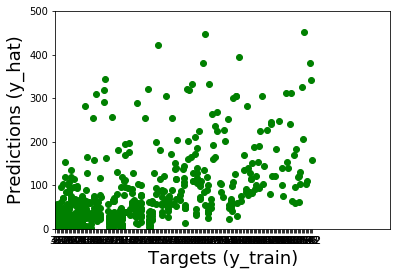

In [268]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat, color="g")

# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(0,250)
plt.ylim(0,500)
plt.show()

## Find R-squared

In [269]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# our models explains about 97% of the variablity of the data
# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.9708461137145762

In [270]:
# Obtain the bias (intercept) of the regression
reg.intercept_

103.14276415148218

In [271]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([ 2.73941945e+02, -1.07241555e+01, -1.36377734e+02,  1.43019268e+02,
        4.26180766e+00,  5.96068544e-02])

In [273]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary
# some weights are positives others negative
# A positive weight shows that as a feature increases in value, so do reputation score

# Alternatively a negative weight shows that as a feature increases in value. The reputation score.

# A prominent example is mileage. The more a car is being driven the lower the price gets the situation 

,Features,Weights
0,COUNT,273.941945
1,CREDLEV,-10.724156
2,DEBTMEDIAN,-136.377734
3,DEBTPAYMENT10YR,143.019268
4,MD_EARN_WNE,4.261808
5,ADM_RATE,0.059607


# Testing

In [182]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

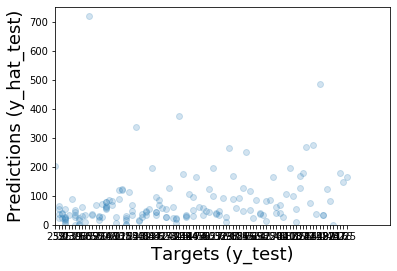

In [194]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(0,100)
plt.ylim(0,750)
plt.show()